---

## ***Language Detection in Speech using GMM***

---

##### **Aim**

The aim of this project is to develop a basic language detection model that classifies spoken audio samples into English or Tamil. Using a small dataset of English and Tamil speech, the project will extract Mel-Frequency Cepstral Coefficients (MFCCs) as features and train Gaussian Mixture Models (GMMs) for each language. The trained models will then be used to predict the language of new audio samples by evaluating which model better fits the given speech characteristics.


##### **Overview**

This project involves developing a language detection system that can distinguish between English and Tamil speech. Using a dataset of audio samples in both languages, we extract Mel-Frequency Cepstral Coefficients (MFCCs) to capture the essential features of the speech signals. Gaussian Mixture Models (GMMs) are then trained separately for each language based on these features. The system predicts the language of a new audio sample by comparing how well the sample fits the trained models, providing a straightforward yet effective method for language classification.

##### **Steps**

1. **Data Collection**:
    - Gather and organize a dataset of English and Tamil speech samples.
    - Structure the dataset in directories named `english` and `tamil`, each containing `.wav` audio files.

2. **Feature Extraction**:
    - Implement a function to load audio files and extract Mel-Frequency Cepstral Coefficients (MFCCs) as features using the `librosa` library.
    - Compute the mean MFCC values for each audio file.

3. **Model Training**:
    - Use the extracted MFCC features to train Gaussian Mixture Models (GMMs) for each language.
    - Implement a function to train the GMMs with a specified number of components and regularization parameter.

4. **Prediction**:
    - Implement a function to predict the language of a given audio sample by comparing the scores from the English and Tamil GMMs.
    - Choose the language with the higher likelihood score.

5. **Evaluation**:
    - Organize a labeled test dataset similar to the training dataset.
    - Predict the language for each test sample and compute the accuracy by comparing predictions with true labels.

6. **Implementation and Testing**:
    - Write the complete code to perform the steps above, including data loading, feature extraction, model training, prediction, and evaluation.
    - Test the model with various audio samples to ensure it performs well.

    ---
    

In [215]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix

In [216]:
class LanguageDetector:
    def __init__(self, english_train_directory, tamil_train_directory, english_test_directory, tamil_test_directory):
        self.english_train_directory = english_train_directory
        self.tamil_train_directory = tamil_train_directory
        self.english_test_directory = english_test_directory
        self.tamil_test_directory = tamil_test_directory
        self.english_gmm_model = None
        self.tamil_gmm_model = None

    @staticmethod
    def extract_mfcc_features(audio_file_path):
        audio_signal, sample_rate = librosa.load(audio_file_path, sr=None)
        mfcc_features = librosa.feature.mfcc(y=audio_signal, sr=sample_rate, n_mfcc=13)
        return np.mean(mfcc_features.T, axis=0)

    def load_audio_features(self, data_directory, label):
        feature_list = []
        label_list = []
        for dir_path, _, file_names in os.walk(data_directory):
            for file_name in file_names:
                if file_name.endswith('.wav'):
                    audio_file_path = os.path.join(dir_path, file_name)
                    mfcc_features = self.extract_mfcc_features(audio_file_path)
                    feature_list.append(mfcc_features)
                    label_list.append(label)
        return np.array(feature_list), np.array(label_list)

    def train_gmm_model(self, feature_array, num_components=4, reg_covar_value=1e-2):
        gmm_model = GaussianMixture(n_components=num_components, max_iter=100, covariance_type='diag', n_init=3, reg_covar=reg_covar_value)
        gmm_model.fit(feature_array)
        return gmm_model

    def prepare_and_train_models(self):
        # Load training data
        english_train_features, _ = self.load_audio_features(self.english_train_directory, 'english')
        tamil_train_features, _ = self.load_audio_features(self.tamil_train_directory, 'tamil')

        # Train separate models for English and Tamil
        self.english_gmm_model = self.train_gmm_model(english_train_features)
        self.tamil_gmm_model = self.train_gmm_model(tamil_train_features)

    def predict_language(self, features):
        english_score = self.english_gmm_model.score([features])
        tamil_score = self.tamil_gmm_model.score([features])
        return 'english' if english_score > tamil_score else 'tamil'

    def evaluate_model(self):
        # Load testing data
        english_test_features, english_test_labels = self.load_audio_features(self.english_test_directory, 'english')
        tamil_test_features, tamil_test_labels = self.load_audio_features(self.tamil_test_directory, 'tamil')

        X_test = np.vstack((english_test_features, tamil_test_features))
        y_test = np.hstack((english_test_labels, tamil_test_labels))
        
        y_pred = [self.predict_language(features) for features in X_test]
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f'Accuracy: {accuracy:.2f}')
        print('Confusion Matrix:')
        plt.title("Confusion Matrix")
        sns.heatmap(conf_matrix, annot=True, cmap = 'YlGnBu', xticklabels=['english', 'tamil'], yticklabels=['english', 'tamil'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

In [217]:
# Directories for language data
english_train_directory = r'..\Speech_classification\Speech_train\English'
tamil_train_directory = r'..\Speech_classification\Speech_train\Tamil'

# Directories for language data
english_test_directory = r'..\Speech_classification\Speech_test\English'
tamil_test_directory = r'..\Speech_classification\Speech_test\Tamil'

In [218]:
language_detector = LanguageDetector(english_train_directory, tamil_train_directory, english_test_directory, tamil_test_directory)
language_detector.prepare_and_train_models()

Accuracy: 0.67
Confusion Matrix:


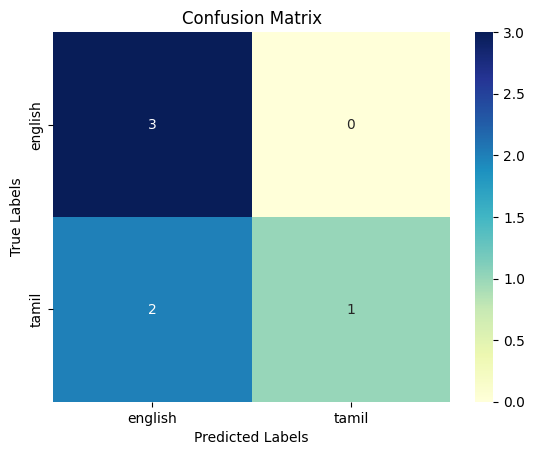

In [219]:
# Evaluate the model
language_detector.evaluate_model()